In [42]:
import torch
import torch.nn as nn
import torch.nn.init as init
import os
from torch import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import math

print(torch.cuda.is_available())

True


In [43]:
device='cuda' 


# Define network parameters
W1 = torch.randn(20, 10, device=device, requires_grad=True)
b1 = torch.randn(20, 1, device=device, requires_grad=True)
W2 = torch.randn(20, 1, device=device, requires_grad=True)
b2 = torch.randn(1, device=device, requires_grad=True)

# Define forward pass function
def forward(x):
    z = torch.matmul(W1, x) + b1
    a = torch.tanh(z)
    y_hat = torch.matmul(W2.T, a) + b2
    return y_hat

# Define loss function
def loss(y_hat, y):
    return torch.mean(torch.abs(y_hat - y))

# Generate random input and output data
x = torch.randn(100, 10, 1, device=device)
y = torch.randn(100, 1, 1, device=device)

# Compute forward pass and loss
y_hat = forward(x)
L = loss(y_hat, y)

# Compute gradients with autograd
L.backward()
auto_W1 = W1.grad
auto_b1 = b1.grad
auto_W2 = W2.grad
auto_b2 = b2.grad

# Compute gradients manually
hand_b2 = torch.mean(torch.sign(y_hat - y), dim=0)
hand_W2 = torch.mean(torch.sign(y_hat - y) * torch.tanh(torch.matmul(W1, x) + b1), dim=0)
hand_b1 = torch.mean(torch.sign(y_hat - y) * W2 * (1 - torch.tanh(torch.matmul(W1, x) + b1) ** 2), dim=0)
hand_W1 = torch.mean(torch.matmul(torch.sign(y_hat - y) * W2 * (1 - torch.tanh(torch.matmul(W1, x) + b1) ** 2), x.permute(0, 2, 1)), dim=0)


# Compare gradients
print('W1 diff:', torch.linalg.norm(auto_W1 - hand_W1))
print('b1 diff:', torch.linalg.norm(auto_b1 - hand_b1))
print('W2 diff:', torch.linalg.norm(auto_W2 - hand_W2))
print('b2 diff:', torch.linalg.norm(auto_b2 - hand_b2))



W1 diff: tensor(9.7264e-08, device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)
b1 diff: tensor(2.3148e-08, device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)
W2 diff: tensor(6.9843e-08, device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)
b2 diff: tensor(0., device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)


Epoch: 0 Train loss: tensor(0.8954, grad_fn=<MeanBackward0>) Test loss: tensor(0.8932, grad_fn=<MeanBackward0>)
Epoch: 1 Train loss: tensor(0.8925, grad_fn=<MeanBackward0>) Test loss: tensor(0.8918, grad_fn=<MeanBackward0>)
Epoch: 2 Train loss: tensor(0.8896, grad_fn=<MeanBackward0>) Test loss: tensor(0.8879, grad_fn=<MeanBackward0>)
Epoch: 3 Train loss: tensor(0.8905, grad_fn=<MeanBackward0>) Test loss: tensor(0.8899, grad_fn=<MeanBackward0>)
Epoch: 4 Train loss: tensor(0.8888, grad_fn=<MeanBackward0>) Test loss: tensor(0.8877, grad_fn=<MeanBackward0>)
Epoch: 5 Train loss: tensor(0.8894, grad_fn=<MeanBackward0>) Test loss: tensor(0.8886, grad_fn=<MeanBackward0>)
Epoch: 6 Train loss: tensor(0.8884, grad_fn=<MeanBackward0>) Test loss: tensor(0.8868, grad_fn=<MeanBackward0>)
Epoch: 7 Train loss: tensor(0.8894, grad_fn=<MeanBackward0>) Test loss: tensor(0.8886, grad_fn=<MeanBackward0>)
Epoch: 8 Train loss: tensor(0.8878, grad_fn=<MeanBackward0>) Test loss: tensor(0.8866, grad_fn=<MeanBack

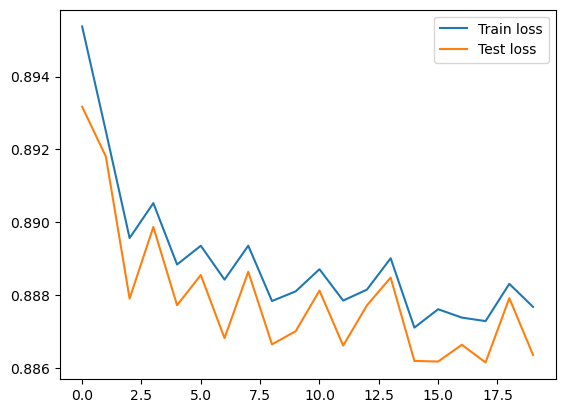

In [55]:
# Train this model on the sklearn California Housing Prices datasets.
# • For this you may use the optimizer and learning rates of your choice and train
# for 20-50 epochs.
# • Take half the data for training and half for testing.
# • Create a validation set from the training set and use it to select a good learning
# rate.
# • You might want to use the convenient Xavier initialization.
# • You are free to use the torch.optim package for this part.
# • To speed up things, run the training loop by batches (e.g. 4, 8, 32, 64, etc.).
# PyTorch’s DataLoader would be a useful tool to easily fetch a predefined set
# of batches per training iteration.
# • Report the mean squared error on the train and test set after each epoch.
# • You will need to adjust the size of W 1 to fit the size of this data.
device='cpu'
# Load the data
data = fetch_california_housing()
X = data['data']
y = data['target']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Normalize the data
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Convert to torch tensors
X_train = torch.from_numpy(X_train).float().to(device)
X_test = torch.from_numpy(X_test).float().to(device)
y_train = torch.from_numpy(y_train).float().to(device)
y_test = torch.from_numpy(y_test).float().to(device)

# Define the network parameters

W1 = torch.randn(20, 8, device=device, requires_grad=True)
b1 = torch.randn(20, 1, device=device, requires_grad=True)
W2 = torch.randn(20, 1, device=device, requires_grad=True)
b2 = torch.randn(1, device=device, requires_grad=True)
torch.nn.init.xavier_uniform_(W1)
torch.nn.init.xavier_uniform_(W2)
torch.nn.init.constant_(b1, 0)
torch.nn.init.constant_(b2, 0)

# Define the network
def forward(x):
    z = torch.matmul(W1, x) + b1
    a = torch.tanh(z)
    y_hat = torch.matmul(W2.T, a) + b2
    return y_hat
    
# Define the loss function
def my_loss(y_hat, y):
    return torch.mean(torch.abs(y_hat - y))

# Define the training loop
def train(X_train, y_train, X_test, y_test, batch_size, lr, epochs):
    global W1, b1, W2, b2
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        # Shuffle the data
        idx = torch.randperm(X_train.shape[0])
        X_train = X_train[idx]
        y_train = y_train[idx]
        # Train the model
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size].T
            y_batch = y_train[i:i+batch_size].reshape(-1, 1, 1)
            y_hat = forward(X_batch)
            L = my_loss(y_hat, y_batch)
            L.backward()
            with torch.no_grad():
                W1 -= lr * W1.grad
                b1 -= lr * b1.grad
                W2 -= lr * W2.grad
                b2 -= lr * b2.grad
                W1.grad.zero_()
                b1.grad.zero_()
                W2.grad.zero_()
                b2.grad.zero_()
        # Compute the loss on the train and test set
        y_hat_train = forward(X_train.T)
        y_hat_test = forward(X_test.T)
        train_loss = my_loss(y_hat_train, y_train.reshape(-1, 1, 1))
        test_loss = my_loss(y_hat_test, y_test.reshape(-1, 1, 1))
        train_losses.append(train_loss.detach().numpy())
        test_losses.append(test_loss.detach().numpy())
        print('Epoch:', epoch, 'Train loss:', train_loss, 'Test loss:', test_loss)
    return train_losses, test_losses

# Train the model
train_losses, test_losses = train(X_train, y_train, X_test, y_test, batch_size=12, lr=0.01, epochs=20)

# Plot the losses
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()




In [156]:
# question 2 
# Consider the neural network
# f(x) = WF ρ ◦ WL . . . ρ ◦ Wi . . . ρ ◦ W2ρ ◦ W1x
# where W1 is K × D, Wi
# is K × K for i > 1, and WF is P × K. Note f : RD → RP .
# Take ρ(x) = tanh(x). We will examine different ways to compute the Jacobian ∂f(x)/∂x .
# (a) 
# Use torch tensors to write a function which computes the Jacobian,
# ∂f(x)/∂x , using backward mode automatic differentiation for a given value of x and
# W1, . . . , Wi, . . . , WF where the given matrices are specified by a dictionary of torch
# tensors. Implement and test this for L = 3. Your function should only make use
# of basic matrix operations (e.g. torch.matmul(), torch.tanh(), etc). You may not
# use autograd or autograd.jacobian for your implementation (but you can use them
# to unit test your answer). Test it for the case of D = 2, K = 30, P = 10, your
# solution does not have to cover all edge cases of K, P,D it is sufficient it works on
# the ones provided here.
device='cuda'

# Define the network
def my_nn(x, param_dict):
    # for i in range(1, L+1):
    #     x = torch.matmul(param_dict['W' + str(i)], x)
    #     x = torch.tanh(x)
    #     outputs.append(x)
    # x = torch.matmul(param_dict['WF'], x)
    x = torch.matmul(param_dict['W1'], x)
    for i in range(2, L+1):
        x = torch.matmul(param_dict['W' + str(i)], torch.tanh(x))
    x = torch.matmul(param_dict['WF'], torch.tanh(x))
    return x

# Define the Jacobian function by hand without using autograd
def my_jacobian(x, param_dict):
    # Compute the forward pass
    outputs = []
    x = x.clone().detach().requires_grad_(True)
    x = torch.matmul(param_dict['W1'], x)
    outputs.append(x)
    for i in range(2, L+1):
        x = torch.matmul(param_dict['W' + str(i)], torch.tanh(x))
        outputs.append(x)
    x = torch.matmul(param_dict['WF'], torch.tanh(x))
    # Compute the Jacobian
    J = torch.zeros((P,D),device=device)
    df_dz3 = torch.diag(1-torch.tanh(outputs[-1])**2)
    df_dz3 = param_dict['WF']@ df_dz3
    for i in range(L,1, -1):
        df_dz3 = df_dz3@ param_dict['W' + str(i)]@torch.diag(1-torch.tanh(outputs[i-2])**2)
    df_dz3 = df_dz3@ param_dict['W1']
    # for i in range(y.shape[0]-1):
    #     y[i].backward(retain_graph=True)

        # J[i] = x.grad
        # x.grad.zero_()
    J = df_dz3.clone().detach()
    return J

# Define the parameters
D = 2
K = 30
P = 10
L = 10
param_dict = {}
param_dict['W1'] = torch.randn(K, D, device=device, requires_grad=True)
for i in range(2, L+1):
    param_dict['W' + str(i)] = torch.randn(K, K, device=device, requires_grad=True)

param_dict['WF'] = torch.randn(P, K, device=device, requires_grad=True)

# Define the input
data = torch.randn(D, device=device, requires_grad=True)
# Compute the Jacobian
J = my_jacobian(data, param_dict)
print("my_jacobian:\n",J)

# Compare with autograd


J_autograd = torch.autograd.functional.jacobian(lambda x: my_nn(x, param_dict), data, create_graph=True)
print("auto_jocobian:\n",J_autograd)


my_jacobian:
 tensor([[-37.9505,  47.9006],
        [-42.9060,  55.2591],
        [ -0.0748,   1.1327],
        [-10.8550,  10.8616],
        [-12.6457,  15.2851],
        [ -7.4347,   9.5586],
        [-35.2445,  43.1480],
        [ 24.9435, -35.1895],
        [-35.8318,  43.6200],
        [ -1.3221,   2.2004]], device='cuda:0')
auto_jocobian:
 tensor([[-37.9505,  47.9006],
        [-42.9060,  55.2591],
        [ -0.0748,   1.1327],
        [-10.8550,  10.8616],
        [-12.6457,  15.2851],
        [ -7.4347,   9.5586],
        [-35.2445,  43.1480],
        [ 24.9435, -35.1895],
        [-35.8318,  43.6200],
        [ -1.3221,   2.2004]], device='cuda:0', grad_fn=<ViewBackward0>)


In [ ]:
# (c) (4 points) Benchmark the Jacobian computation of (b) compared to that of (c)
# for L=3,5,10. Report speed of these answers on test cases using GPU and CPU



/tmp/ipykernel_7772/3794295671.py:6: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x=torch.range(-1,2,0.1)


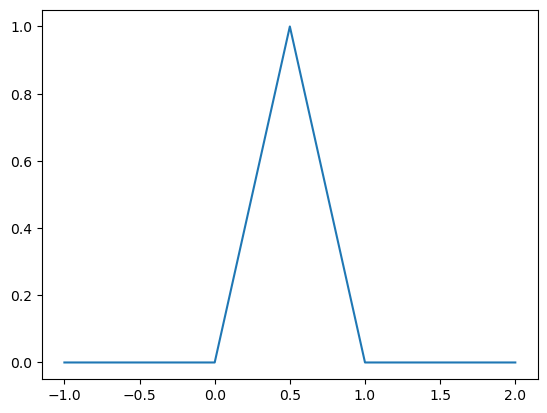

In [ ]:
# 3(a)

def my_fun(x):
    return torch.relu(torch.relu(x*torch.tensor(2)) - torch.relu(x*torch.tensor(4) - torch.tensor(2)))

x=torch.range(-1,2,0.1)

plt.plot(x, my_fun(x))

# For the following functions find by hand the parameters of a neural network that can
# fit these functions. You should use either a 1 or 2 hidden layer network and may use
# either sigmoid or ReLU non-linearities. In each case justify your answer and how you
# arrived at it (without using numerical/software packages).


tensor([1.6800])


/tmp/ipykernel_7772/2001599451.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5,5,0.1)


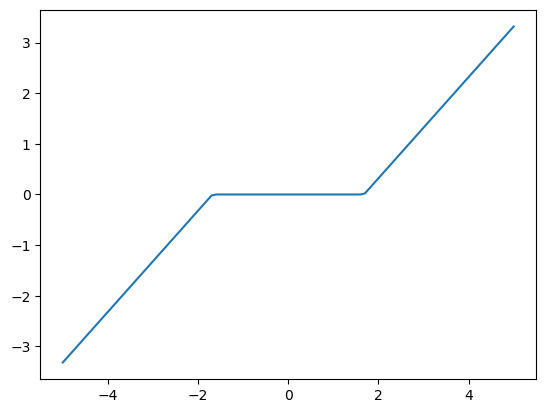

In [ ]:
x = torch.range(-5,5,0.1)
s = torch.randn(1)
def my_fun(x, s):
    return torch.max(torch.abs(x) - s, torch.tensor([0.])) * torch.sign(x)
print(s)
plt.plot(x,my_fun(x, s))

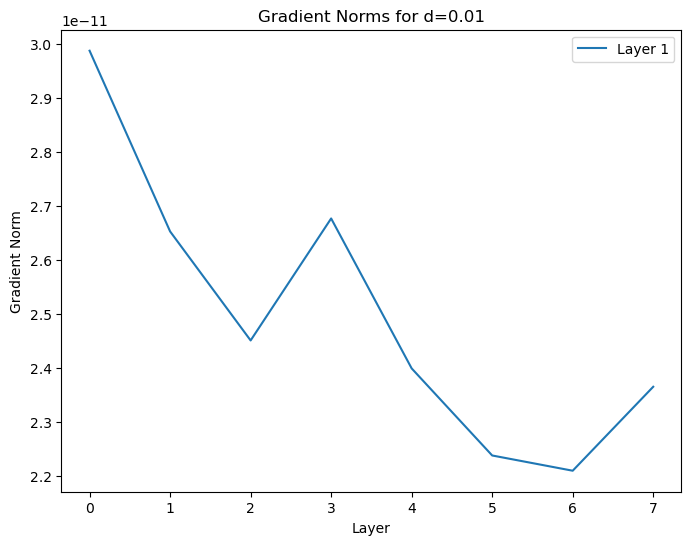

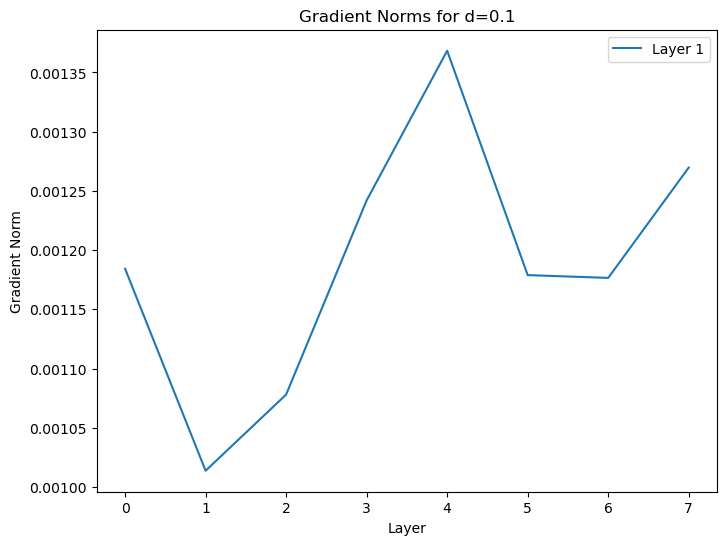

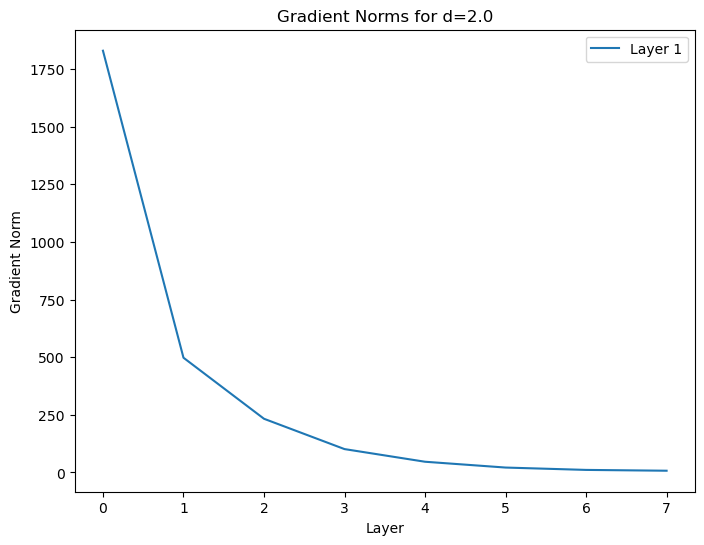

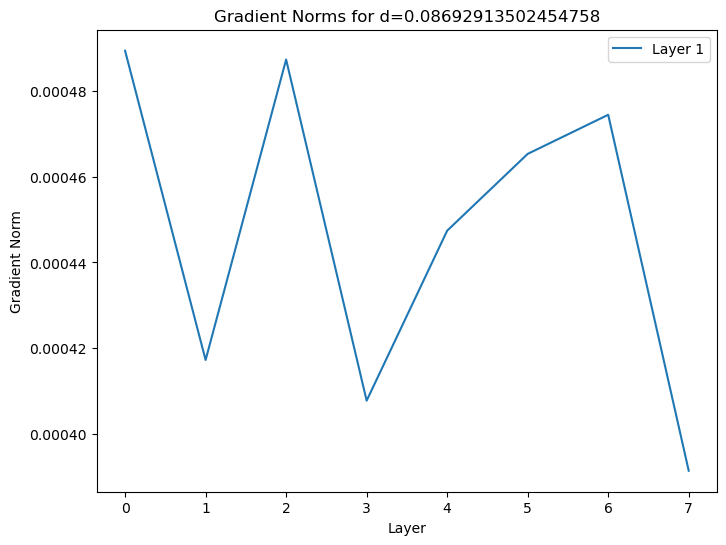

In [108]:
# question 4
device = 'cpu'
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
class MyModel(nn.Module):
    def __init__(self, depth):
        super(MyModel, self).__init__()
        self.depth = depth
        self.linear_list = nn.ModuleList([nn.Linear(784, 50)])
        for i in range(depth - 1):
            self.linear_list.append(nn.Linear(50, 50))
        self.output_layer = nn.Linear(50, 10)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = x.view(-1, 784)
        a_list = [x]
        for i in range(self.depth):
            x = self.linear_list[i](x)
            if i < self.depth - 1:
                x = self.activation(x)
            # Keep the gradient buffer from clearing at each layer
            x.retain_grad()
            a_list.append(x)
        output = self.output_layer(x)
        return output, a_list

    def init_weights(self, d):
        for i in range(self.depth):
            nn.init.uniform_(self.linear_list[i].weight, -d, d)
            nn.init.zeros_(self.linear_list[i].bias)
        nn.init.uniform_(self.output_layer.weight, -d, d)
        nn.init.zeros_(self.output_layer.bias)

    def loss(self, x, y):
        output, a_list = self.forward(x)
        loss_val = nn.CrossEntropyLoss()(output, y)
        return loss_val, a_list

# forward and backward a minibatch of 256 MNIST digits through the network with depth 8.
# Compute and visualize the gradient norm at each layer. Specifically this refers to
# the magnitude of (∂L/∂a), where a are the post-activation outputs. Your plots should have layer on
# the x-axis and gradient norm on the y-axis. Note that to get the gradient norms
# at each layer you can use retain grad on the layer outputs in the forward pass to
# keep the gradient buffer from clearing at each layer on the backward. Perform this
# for each of the 4 initializations to obtain 4 curves. Note: in this question you do
# not need to train or update the models.
def compute_grad_norms(model, d):
    # Initialize the model
    model.init_weights(d)

    # Load MNIST dataset
    train_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('data', train=True, download=True,
                                   transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),
                                       torchvision.transforms.Normalize(
                                           (0.1307,), (0.3081,))
                                   ])), batch_size=256, shuffle=True)

    # Compute gradient norms at each layer for one minibatch
    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)
        loss, a_list = model.loss(x, y)
        loss.backward()
        grad_norms = torch.zeros(model.depth, 1)
        for i in range(model.depth):
            grad_norms[i] = torch.norm(model.linear_list[i].weight.grad)
        grad_norms = grad_norms.cpu().detach().numpy()
        break

    # Plot the gradient norms for each layer
    plt.figure(figsize=(8,6))
    for i in range(grad_norms.shape[1]):
        plt.plot(grad_norms[:,i], label=f'Layer {i+1}')
    plt.title(f'Gradient Norms for d={d}')
    plt.xlabel('Layer')
    plt.ylabel('Gradient Norm')
    plt.legend()
    plt.show()


# Test the function for all four initializations and depth 8
for d in [0.01, 0.1, 2.0, torch.sqrt(torch.tensor(6/(784+10)))]:
    model = MyModel(8)
    compute_grad_norms(model, d)




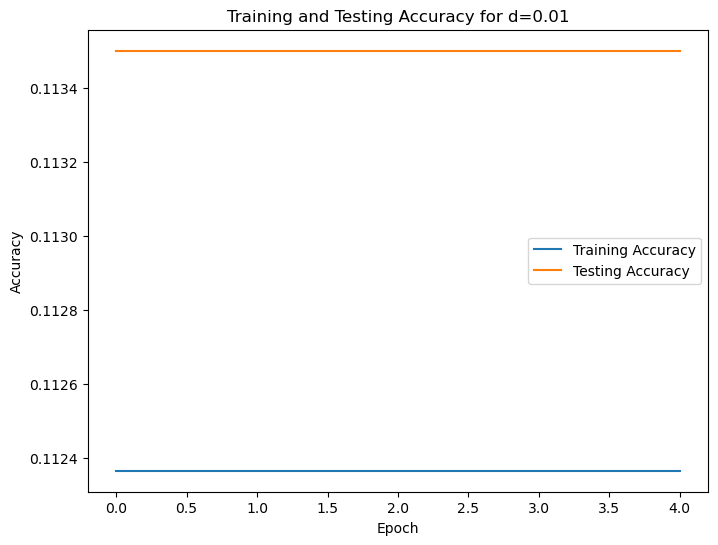

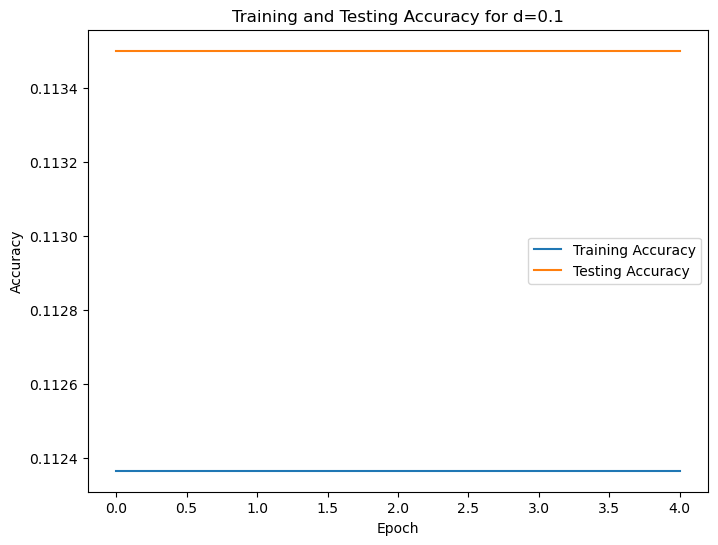

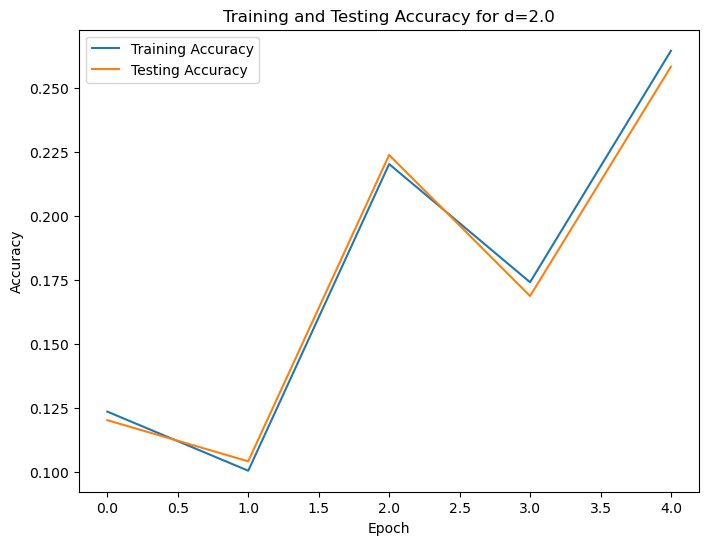

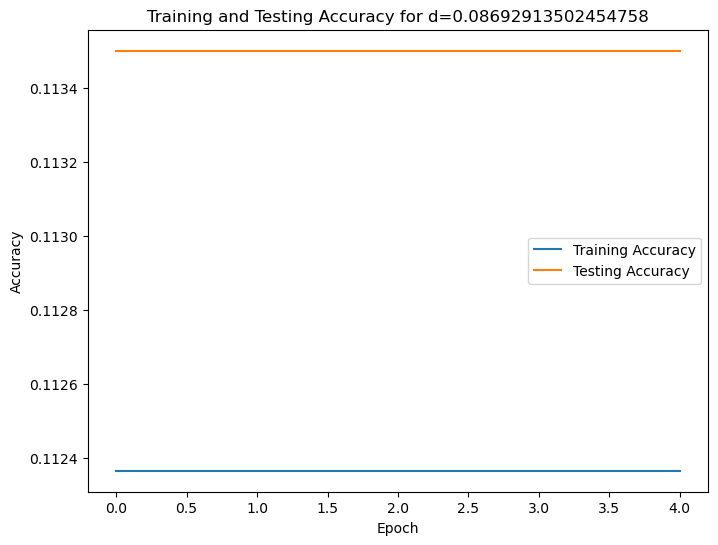

In [105]:
# For each of the initialization settings train the model for 5 epochs on
# MNIST, using the cross-entropy loss. You may use SGD with learning rate of 0.01
# and minibatch sizes of 128. Record the training accuracy and testing accuracy after
# each epoch and plot them versus epochs.
def train_model(model, d, epochs):
    # Initialize the model
    model.init_weights(d)

    # Load MNIST dataset
    train_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('data', train=True, download=True,
                                   transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),
                                       torchvision.transforms.Normalize(
                                           (0.1307,), (0.3081,))
                                   ])), batch_size=128, shuffle=True)
    test_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('data', train=False, download=True,
                                   transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),
                                       torchvision.transforms.Normalize(
                                           (0.1307,), (0.3081,))
                                   ])), batch_size=128, shuffle=True)

    # Train the model
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    train_acc = []
    test_acc = []
    for epoch in range(epochs):
        # Train
        model.train()
        for x, y in train_loader:
            x = x.to(device)
            y = y.to(device)
            loss, _ = model.loss(x, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # Test
        model.eval()
        correct = 0
        total = 0
        for x, y in train_loader:
            x = x.to(device)
            y = y.to(device)
            output, _ = model.forward(x)
            _, predicted = torch.max(output.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
        train_acc.append(correct / total)
        correct = 0
        total = 0
        for x, y in test_loader:
            x = x.to(device)
            y = y.to(device)
            output, _ = model.forward(x)
            _, predicted = torch.max(output.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
        test_acc.append(correct / total)

    # Plot the training and testing accuracy
    plt.figure(figsize=(8,6))
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(test_acc, label='Testing Accuracy')
    plt.title(f'Training and Testing Accuracy for d={d}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


# Train the model for all four initializations and depth 8
for d in [0.01, 0.1, 2.0, torch.sqrt(torch.tensor(6/(784+10)))]:
    model = MyModel(8)
    train_model(model, d, 5)

